# Dans cette section, nous allons nous int√©resser √† la classification des textes par cat√©gorie: 

# Nous verrons comment: 

## 1) charger le contenu du fichier et les cat√©gories
## 2) explorer la base de donn√©es
## 3) pr√©-traitement de la base de donn√©es
## 4) Partition en corpus d‚Äôapprentissage et de test
## 5) extraire des vecteurs caract√©ristiques adapt√©s √† l'apprentissage automatique (Construction de la matrice documents termes pour l‚Äôapprentissage)
## 6) former un mod√®le  pour effectuer la cat√©gorisation
## 7) utiliser une strat√©gie de recherche de grille pour trouver une bonne configuration des composants d'extraction de caract√©ristiques et du classificateur
## 8) Remarques et une touche de NLTK (pour le stemming)
## 9) D√©ploiement de mon mod√®le
## 10) Conclusion


############################

##  **La Classification des documents / Texte**

> ### est l' une des t√¢ches importantes et typique du machine learning supervis√©. C'est affecter des cat√©gories √† des documents, qui peuvent √™tre une page Web, un livre de biblioth√®que, des articles de presse, etc. contient de nombreuses applications telles que le filtrage de spam, le routage de courriers √©lectroniques, l'analyse des sentiments, etc. 

# 1) charger le contenu du fichier et les cat√©gories

## *√Ä propos de cet ensemble de donn√©es* 

### Cet ensemble de donn√©es contient les titres, les URL et les cat√©gories de 422 937 reportages collect√©s par un agr√©gateur Web entre le 10 mars 2014 et le 10 ao√ªt 2014.

### Les cat√©gories de nouvelles incluses dans cet ensemble de donn√©es incluent les entreprises; science et technologie; divertissement; et la sant√©. Diff√©rents articles de presse faisant r√©f√©rence au m√™me article (par exemple, plusieurs articles sur les statistiques de l‚Äôemploi r√©cemment publi√©es) sont √©galement class√©s ensemble.

## *Contenu * 
### Les colonnes incluses dans cet ensemble de donn√©es sont les suivantes:

> ID : l'ID num√©rique de l'article

> TITRE : le titre de l'article

> URL : l'URL de l'article

> EDITEUR : l'√©diteur de l'article

> CAT√âGORIE : la cat√©gorie de l'information; un de: - b : business - t : science et technologie - e : divertissement - m : sant√©

> HISTOIRE : identifiant alphanum√©rique du reportage que l'article traite

> HOSTNAME : nom d'h√¥te o√π l'article a √©t√© publi√©

> TIMESTAMP : horodatage approximatif de la publication de l'article, donn√© en heure Unix (secondes √©coul√©es depuis minuit le 1er janvier 1970)

## *Source*
> Cet ensemble de donn√©es provient du r√©f√©rentiel UCI Machine Learning [https://archive.ics.uci.edu/ml/datasets/News+Aggregator]. Irvine, Californie: Universit√© de Californie, √âcole d‚Äôinformation et d‚Äôinformatique.

In [1]:
import pandas as pd
news = pd.read_csv("C:/Users/User/Desktop/uci-news-aggregator.csv") #Importing data from CSV
news = news.sample(frac=1, random_state=42) #Renvoie un √©chantillon al√©atoire d'√©l√©ments

In [2]:
news.columns #colonnes de la base

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')

In [3]:
#enlever les colonnes qui nous int√©ressent pas dans notre √©tude
columns=['TITLE','PUBLISHER','CATEGORY']
news=news[columns]
news=news.dropna(axis=0)
news=news.reset_index()
news=news.drop(['index'],axis=1)

In [4]:
#visulaliser les 5 premiers lignes due la base 
news.head(5)

TITLE            PUBLISHER  \
0  Only 2 people allowed in the delivery room: Pr...          India Today   
1            A wealth of info, a welter of questions                 KSPR   
2      Robin Thicke Naming Album After Paula Patton‚Ä¶       Hollywood Life   
3  Actress And Civil Rights Activist Ruby Dee Die...  We Got This Covered   
4                Feds to review Ga. Medicaid backlog      McDuffie Mirror   

  CATEGORY  
0        e  
1        b  
2        e  
3        e  
4        m

# 2) explorer la base de donn√©es

In [5]:
news.columns

Index(['TITLE', 'PUBLISHER', 'CATEGORY'], dtype='object')

In [6]:
#dimension de la base
news.shape

(422417, 3)

In [7]:
# summary statistics de la base (count, unique, top, freq)
news.describe()

TITLE PUBLISHER CATEGORY
count                                              422417    422417   422417
unique                                             406453     10985        4
top     The article requested cannot be found! Please ...   Reuters        e
freq                                                  145      3902   152469

In [8]:
#bref r√©sum√© sur la base
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422417 entries, 0 to 422416
Data columns (total 3 columns):
TITLE        422417 non-null object
PUBLISHER    422417 non-null object
CATEGORY     422417 non-null object
dtypes: object(3)
memory usage: 9.7+ MB


## Count Vs Publication

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Counts Vs PUBLISHER')

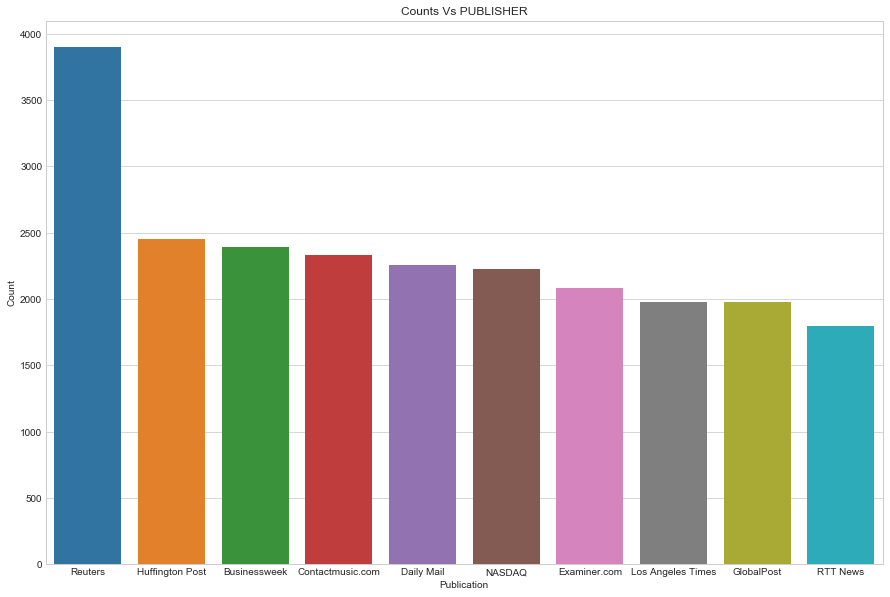

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
z=news.groupby(by=['PUBLISHER'],as_index=False).count().sort_values(by='TITLE',ascending=False).head(10)

plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['PUBLISHER'],y=z['TITLE'], data=z)
plt.xlabel("Publication")
plt.ylabel("Count") 
plt.title("Counts Vs PUBLISHER")

> Le graphique √† barres ci-dessus montre les 10 premiers publieurs dans l'ensemble de donn√©es d'actualit√© en vue du nombre de publications.  Reuters a le num√©ro le plus √©lev√© des publications.

## Count Vs Category

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Counts Vs Category')

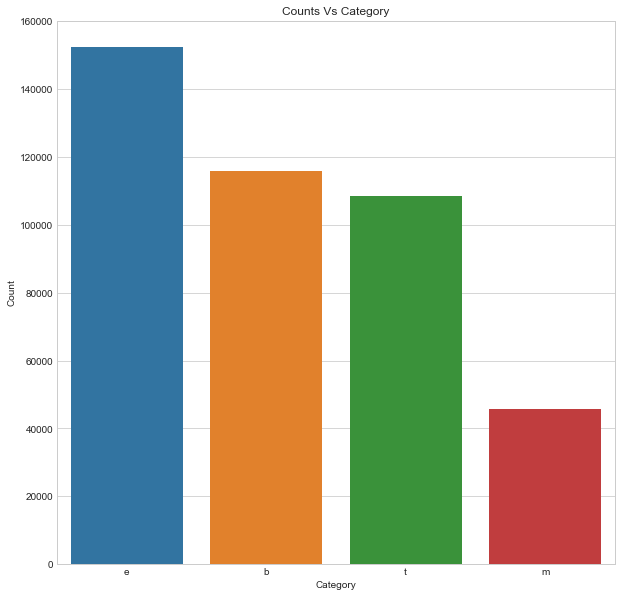

In [10]:
z=news.groupby(by=['CATEGORY'],as_index=False).count().sort_values(by='TITLE',ascending=False).head(10)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['CATEGORY'],y=z['TITLE'], data=z)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Counts Vs Category")

### Le graphique √† barres ci-dessus montre la distribution des publications par cat√©gorie sachant que 
>  **e** :  Entertainment

>  **b** : business 

>  **t** : Science and technology

>  **m** : health

## Dor√©navant, nous allons nous int√©resser seulement aux colonnes "TITLE" et "CATEGORY"

In [11]:
columns=['TITLE','CATEGORY']
news=news[columns]
news=news.dropna(axis=0)
news=news.reset_index()
news=news.drop(['index'],axis=1)

In [12]:
news.head(5)

TITLE CATEGORY
0  Only 2 people allowed in the delivery room: Pr...        e
1            A wealth of info, a welter of questions        b
2      Robin Thicke Naming Album After Paula Patton‚Ä¶        e
3  Actress And Civil Rights Activist Ruby Dee Die...        e
4                Feds to review Ga. Medicaid backlog        m

# 3) Pr√©-traitement de la base de donn√©es

In [13]:
# supprimer les colonnes TITRE en double (d'apr√®s le summary , on n'a pas trouv√© des titres vides 
#mais, en revanche, on a trouv√© des titres en double )
news = news.drop_duplicates('TITLE')
news.shape

(406453, 2)

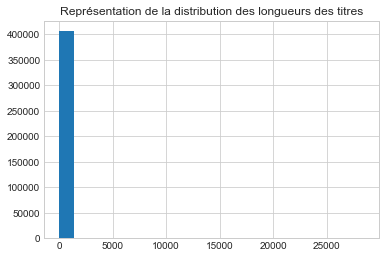

In [14]:
# V√©rifier la distibution des longueurs des titres
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
tst=news.TITLE.map(len)
plt.hist(tst, bins=20)  # arguments are passed to np.histogram
plt.title("Repr√©sentation de la distribution des longueurs des titres")
plt.show()

> ## On n'a pas besoin de limiter les longueurs des titres puisque la distribution est uniforme

# Maintenant, nous allons cr√©er une fonction qui: 
### enl√®ve les caract√®res non ascii
### miniscule les titres et les tokenise
### fait appel au stopwords de nltk et les enl√®ve

In [15]:
from nltk.corpus import stopwords
def get_words( headlines ):               
    headlines_onlyletters = re.sub("[^a-zA-Z]", " ",headlines) #Remove everything other than letters     
    words = headlines_onlyletters.lower().split() #Convert to lower case, split into individual words    
    stops = set(stopwords.words("english"))  #Convert the stopwords to a set for improvised performance                 
    meaningful_words = [w for w in words if not w in stops]   #Removing stopwords
    return( " ".join( meaningful_words )) #Joining the words

In [16]:
from tqdm import tqdm, tqdm_notebook

pd.options.display.max_columns = 200
pd.options.mode.chained_assignment = None

from collections import Counter
import re
import numpy as np

tqdm_notebook().pandas()
from tqdm._tqdm_notebook import tqdm_notebook

tqdm_notebook.pandas()

A Jupyter Widget

## Une nouvelle colonne ¬´cleaned_text¬ª peut √™tre facilement cr√©√©e √† l'aide de la m√©thode "progress_map" appliqu√©e √† la colonne ¬´TITLE¬ª.

In [17]:
cleaned_text = news.TITLE.progress_map(get_words)

A Jupyter Widget

In [18]:
#concat√©ner la base news et la nouvelle colonne cleaned_text 
news =pd.concat([news, cleaned_text], axis=1, sort=False)

In [19]:
news.head(5)

TITLE CATEGORY  \
0  Only 2 people allowed in the delivery room: Pr...        e   
1            A wealth of info, a welter of questions        b   
2      Robin Thicke Naming Album After Paula Patton‚Ä¶        e   
3  Actress And Civil Rights Activist Ruby Dee Die...        e   
4                Feds to review Ga. Medicaid backlog        m   

                                               TITLE  
0  people allowed delivery room pregger mila kuni...  
1                       wealth info welter questions  
2             robin thicke naming album paula patton  
3        actress civil rights activist ruby dee dies  
4                    feds review ga medicaid backlog

In [20]:
myList = list(news.columns)
myList[2] = 'cleaned_text'
news.columns = myList

In [21]:
news.head(5)

TITLE CATEGORY  \
0  Only 2 people allowed in the delivery room: Pr...        e   
1            A wealth of info, a welter of questions        b   
2      Robin Thicke Naming Album After Paula Patton‚Ä¶        e   
3  Actress And Civil Rights Activist Ruby Dee Die...        e   
4                Feds to review Ga. Medicaid backlog        m   

                                        cleaned_text  
0  people allowed delivery room pregger mila kuni...  
1                       wealth info welter questions  
2             robin thicke naming album paula patton  
3        actress civil rights activist ruby dee dies  
4                    feds review ga medicaid backlog

### Nous avons besoin maintenant d'encoder la variable CATEGORY en tant que variable cat√©gorielle 

In [22]:
news['category_id'] = news['CATEGORY'].factorize()[0] 

In [23]:
news.head(5)

TITLE CATEGORY  \
0  Only 2 people allowed in the delivery room: Pr...        e   
1            A wealth of info, a welter of questions        b   
2      Robin Thicke Naming Album After Paula Patton‚Ä¶        e   
3  Actress And Civil Rights Activist Ruby Dee Die...        e   
4                Feds to review Ga. Medicaid backlog        m   

                                        cleaned_text  category_id  
0  people allowed delivery room pregger mila kuni...            0  
1                       wealth info welter questions            1  
2             robin thicke naming album paula patton            0  
3        actress civil rights activist ruby dee dies            0  
4                    feds review ga medicaid backlog            2

In [24]:
news.CATEGORY.value_counts()

e    146856
b    111534
t    104418
m     43645
Name: CATEGORY, dtype: int64

In [25]:
news.category_id.value_counts()

0    146856
1    111534
3    104418
2     43645
Name: category_id, dtype: int64

In [26]:
# 0: e:  Entertainment
# 1: b: business 
# 2: m: health
# 3: t: Science and technology

## Une fois les donn√©es sont propres, nous les enregistrons sur le disque

In [27]:
news[['cleaned_text', 'category_id']].to_csv('./data/final_text2.csv')

In [1]:
import pandas as pd
data = pd.read_csv('./data/final_text2.csv')
print(data.shape)

(406453, 3)


In [2]:
print(data.head(5))

   Unnamed: 0                                       cleaned_text  category_id
0           0  people allowed delivery room pregger mila kuni...            0
1           1                       wealth info welter questions            1
2           2             robin thicke naming album paula patton            0
3           3        actress civil rights activist ruby dee dies            0
4           4                    feds review ga medicaid backlog            2


In [3]:
data= data.drop('Unnamed: 0',axis=1)

In [4]:
data.head(5)

cleaned_text  category_id
0  people allowed delivery room pregger mila kuni...            0
1                       wealth info welter questions            1
2             robin thicke naming album paula patton            0
3        actress civil rights activist ruby dee dies            0
4                    feds review ga medicaid backlog            2

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406453 entries, 0 to 406452
Data columns (total 2 columns):
cleaned_text    406443 non-null object
category_id     406453 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.2+ MB


# 4) Partition en corpus d‚Äôapprentissage et de test

## => Avant, parlons un peu sur le Processus de cat√©gorisation de textes

### Il importe de ne pas utiliser les m√™mes donn√©s pour la mod√©lisation et l‚Äô√©valuation des classifieurs dans une d√©marche d‚Äôanalyse pr√©dictive. 

###  une partie des observations est extraite al√©atoirement, on parle d‚Äô√©chantillon d‚Äôapprentissage, elle est d√©volue √† la construction du mod√®le ; la partie restante, dite √©chantillon test, est consacr√©e √† la mesure des performances. La r√©partition 2/3 vs. 1/3 est souvent utilis√©e mais il n‚Äôy a pas de r√®gle v√©ritable en la mati√®re.

### Dans le cadre de la cat√©gorisation de textes, cela se traduit par une partition du corpus AVANT la construction des matrices documents termes. Il ne faut pas que les observations du corpus de test puissent intervenir dans la constitution du dictionnaire (la liste des termes) et dans le calcul des pond√©rations (si on utilise la pond√©ration TF-IDF par exemple) de la matrice utilis√©e pour l‚Äôapprentissage.

### Cette contrainte ‚Äì partition des corpus avant la construction des matrices documents termes ‚Äì prend tout son sens lorsque nous utilisons le classifieur final en d√©ploiement, lors du classement d‚Äôun document suppl√©mentaire qui n‚Äôest pas disponible lors de la phase de mod√©lisation. Il est √©vident qu‚Äôil ne doit intervenir en rien dans la construction du mod√®le :

### s‚Äôil introduit des termes inconnus dans la phase de mod√©lisation, ils doivent √™tre ignor√©s ; dem√™me, nous ne connaissons pas le nombre de documents √† classer lors du cycle de vie du mod√®le, le calcul de l‚ÄôIDF des termes (inverse document frequency) doit se baser exclusivement sur les informations issues de l‚Äô√©chantillon d‚Äôapprentissage.


> ### Nous cr√©ons les corpus d‚Äôapprentissage et de test avec, respectivement, ntrain = 2/3=270969 documents etntest = 1/3= 135484 documents, via une partition au hasard, stratifi√©e selon les classes pour pr√©server les proportions des 4 cat√©gories dans les sous-ensembles.
> ### Nous utilisons la proc√©dure train_test_split du module sklearn.model_selection.

In [6]:
#subdivision into train and test sets
X, y = data.cleaned_text.fillna(' '), data.category_id
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=1/3, train_size=2/3, 
                                                    random_state=42,
                                                    stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(270968,) (135485,) (270968,) (135485,)


In [7]:
#frequency distribution of the class attribute
#train set
freqTrain = pd.crosstab(index=y_train,columns="count")
print(freqTrain/freqTrain.sum())
#test set
freqTest = pd.crosstab(index=y_train,columns="count")
print(freqTest/freqTest.sum())

col_0           count
category_id          
0            0.361312
1            0.274409
2            0.107378
3            0.256901
col_0           count
category_id          
0            0.361312
1            0.274409
2            0.107378
3            0.256901


> Les proportions sont bien respect√©es, la pr√©cision de l‚Äô√©valuation n‚Äôen sera qu‚Äôam√©lior√©e.

# 5) Extraire des fonctionnalit√©s 
### Les fichiers texte sont en r√©alit√© des s√©ries de mots (ordonn√©s). Afin d'ex√©cuter des algorithmes d'apprentissage automatique, nous devons convertir les fichiers texte en vecteurs d'entit√©s num√©riques.
### En fait, Les classificateurs ont derri√®re eux des op√©rations math√©matiques qui ne fonctionnent que sur des nombres. Nous devrons donc transformer notre contribution sous forme num√©rique. 

# a) Bag of words:
### La mani√®re la plus intuitive de le faire est la repr√©sentation par sacs de mots:
### En bref, nous segmentons chaque fichier texte en mots (pour la division en anglais par espace) et comptons le nombre de fois o√π chaque mot appara√Æt dans chaque document et assignons enfin un identifiant √† chaque mot. Chaque mot unique dans notre dictionnaire correspondra √† une fonctionnalit√© (fonction descriptive).

### Scikit-learn poss√®de un composant de haut niveau qui cr√©era des vecteurs de fonctionnalit√©s pour nous "CountVectorizer".

### (1) Nous instancions l‚Äôobjet de calcul CountVectorizer. 
### (2) Nous appelons la m√©thode fit_transform() en passant en param√®tre les messages du corpus d‚Äôapprentissage x_train.

In [8]:
#import the CountVectorizer tool
from sklearn.feature_extraction.text import CountVectorizer
parseur = CountVectorizer(min_df=10)
# ngram_range=(1, 2)
#create the document term matrix
XTrain = parseur.fit_transform(x_train)

> min_df : float dans la plage [0.0, 1.0] ou int, valeur par d√©faut = 1

Lors de la construction du vocabulaire, ignorez les termes ayant une fr√©quence de document strictement inf√©rieure au seuil donn√©. Cette valeur est √©galement appel√©e coupure dans la litt√©rature. 

### Ici, en faisant ' parseur.fit_transform (x_train) ', nous apprenons le dictionnaire de vocabulaire et il retourne une matrice de document-terme [n_samples, n_features].

### Ainsi, Nous pouvons afficher le nombre et la liste des termes qui composent le dictionnaire.

In [36]:
#number of tokens
print(len(parseur.get_feature_names()))
#list of tokens
print(parseur.get_feature_names())

13649
['aa', 'aaa', 'aaliyah', 'aapl', 'aaron', 'abandon', 'abandoned', 'abandoning', 'abandons', 'abba', 'abbott', 'abbv', 'abbvie', 'abby', 'abc', 'abe', 'abercrombie', 'abilities', 'ability', 'able', 'abnormalities', 'aboard', 'aborted', 'abortion', 'abound', 'abrams', 'abramson', 'abroad', 'abruptly', 'abs', 'absence', 'absolute', 'absolutely', 'absurd', 'abu', 'abundant', 'abuse', 'abused', 'abusing', 'ac', 'aca', 'academic', 'academy', 'accelerate', 'accelerated', 'accelerates', 'accelerating', 'acceleration', 'accelerators', 'accent', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessible', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidents', 'acclaimed', 'accord', 'according', 'account', 'accounting', 'accounts', 'accra', 'accuracy', 'accurate', 'accurately', 'accusations', 'accuse', 'accused', 'accuser', 'accuses', 'ace', 'achieve', 'achievement', 'achievements', 'achieves', 'acid', 'acidification', 'acids', 

> Nous observons 13649 termes.

# b) Des occurrences aux fr√©quences 
### Le nombre d'occurrences est un bon d√©but, mais il y a un probl√®me: les documents plus longs auront des valeurs moyennes plus √©lev√©es que les documents plus courts, m√™me s'ils peuvent parler des m√™mes sujets.

### Pour √©viter ces divergences potentielles, il suffit de diviser le nombre d'occurrences de chaque mot d'un document par le nombre total de mots du document: ces nouvelles fonctionnalit√©s sont appel√©es tf (fr√©quences de terme).

### Un autre raffinement de tf consiste √† r√©duire les poids pour les mots qui apparaissent dans de nombreux documents du corpus et sont donc moins informatifs que ceux qui ne se produisent que dans une petite partie du corpus.

### Cette r√©duction est appel√©e tf-idf (la fr√©quence d'un terme (TF) multipli√©e par la fr√©quence de document inverse (IDF) ).

### En d'autres termes, plus le score TF * IDF (poids) est √©lev√©, plus le terme est rare et inversement.

### Les deux tf et tf-idf peut √™tre calcul√©e comme suit:

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tf_transformer = tfidf_transformer.fit(XTrain) #m√©thode pour adapter notre estimateur aux donn√©es
X_train_tf = tf_transformer.transform(XTrain) #m√©thode pour transformer notre matrice de comptage en une repr√©sentation tf-idf
X_train_tf.shape

(270968, 13649)

### Pour la base d'apprentissage, nous avons obtenu une matrice tf-idf de dimension (270968, 13649)

# 6) Former un classificateur 

### Maintenant que nous avons nos fonctionnalit√©s, nous pouvons former un classificateur pour essayer de pr√©dire la cat√©gorie d'un article. 
### Diff√©rents algorithmes peuvent √™tre utilis√©s pour la classification de texte. Commen√ßons par un classificateur Naives Bayes , qui fournit une base de r√©f√©rence int√©ressante pour cette t√¢che.

# 1) Multinomial Naive Bayes 

## *Parlons un peu sur l'algorithme Naive Bayes * 

### **C'est une technique de classification bas√©e sur le  th√©or√®me de Bayes avec une hypoth√®se d'ind√©pendance parmi les pr√©dicteurs. En termes simples, un classificateur Naive Bayes suppose que la pr√©sence d'une entit√© particuli√®re dans une classe n'est pas li√©e √† la pr√©sence d'une autre entit√©. Par exemple, un fruit peut √™tre consid√©r√© comme une pomme s'il est rouge, rond et d'environ 3 pouces de diam√®tre. M√™me si ces caract√©ristiques d√©pendent les unes des autres ou sur l'existence des autres caract√©ristiques, toutes ces propri√©t√©s contribuent ind√©pendamment √† la probabilit√© que ce fruit soit une pomme et c'est pourquoi on l'appelle ¬´Naive¬ª.**

### Le mod√®le Naive Bayes est facile √† construire et particuli√®rement utile pour les tr√®s grands ensembles de donn√©es. En plus de la simplicit√©, Naive Bayes est connue pour surpasser les m√©thodes de classification les plus sophistiqu√©es.


### scikit-learn comprend plusieurs variantes de ce classificateur; le plus appropri√© pour le compte de mots est la variante multinomiale:

### Vous pouvez facilement construire un NBclassifier dans scikit en utilisant 2 lignes de code ci-dessous:

In [10]:
#import the class LogistiRegression
from sklearn.naive_bayes import MultinomialNB
#instatiate the object
modelFirst = MultinomialNB()

In [11]:
#perform the training process
clf= modelFirst.fit(X_train_tf,y_train)

In [12]:
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

> **Param√®tres de MultinomialNB**

#### *alpha* : param√®tre de lissage additif (1: par d√©faut, 0 pour aucun lissage)

#### *fit_prior* : permet d'apprendre les classes ant√©rieures (true: par d√©faut, false: signifie q'un uniforme ant√©rieur sera utilis√©) 

#### *class_prior* : taille(n_classes) : probabilit√©s ant√©rieures de classes (aucun: par d√©faut, si sp√©cifi√©: les valeurs ant√©rieures ne sont pas ajust√©es en fonction des donn√©es) 

## Evaluation sur l‚Äô√©chantillon test

### Pour appliquer le mod√®le sur le corpus de texte, nous devons construire la matrice documents termes correspondante, en utilisant le dictionnaire issu de l‚Äôapprentissage.
### Nous appliquons la m√©thode transform() de l‚Äôobjet parseur instanci√© lors de la phase d‚Äôapprentissage sur le corpus de test issu de la partition al√©atoire des donn√©es .

In [13]:
X_test=parseur.transform(x_test)
X_test_tf= tf_transformer.transform(X_test)
X_test_tf.shape

(135485, 13649)

> Nous avons une matrice (135485, 13649) cette fois-ci :
135485 lignes parce qu‚Äôil y a 135485 documents dans le corpus de test, 
13649 colonnes parce que 13649 termes ont √©t√© extraits du corpus d‚Äôapprentissage.

> Nous calculons les pr√©dictions du mod√®le sur les documents de l‚Äô√©chantillon test‚Ä¶

In [14]:
#prediction for the test set
predTest = clf.predict(X_test_tf)

## Performance du classificateur NB: 
### Nous allons maintenant tester les performances du classificateur NB sur l‚Äô ensemble de test et d√©duisons les diff√©rents indicateurs de performances en les confrontant avec lesvaleurs observ√©es de l‚Äôattribut cible sur l‚Äô√©chantillon test.
### Nous utilisons les proc√©dures dumodule metrics de scikit-learn.

In [15]:
#import the metrics class for the performance measurement
from sklearn import metrics
#confusion matrix
mcTest = metrics.confusion_matrix(y_test,predTest)
print(mcTest)

#accuracy rate
print(metrics.accuracy_score(y_test,predTest))

print(metrics.classification_report(y_test, predTest))       

[[47389   639   157   767]
 [  786 33703   311  2378]
 [  714   733 12716   386]
 [  826  2388   201 31391]]
0.924080156475
             precision    recall  f1-score   support

          0       0.95      0.97      0.96     48952
          1       0.90      0.91      0.90     37178
          2       0.95      0.87      0.91     14549
          3       0.90      0.90      0.90     34806

avg / total       0.92      0.92      0.92    135485



####################################################################################################"

### Voil√†! Voici un r√©sum√© de ce que j'ai fait: j'ai charg√© les donn√©es, les ai divis√©es en formations et tests, ajust√© un mod√®le aux donn√©es d'entra√Ænement, fait des pr√©dictions bas√©es sur ces donn√©es et test√© les pr√©dictions sur les donn√©es de test. Semble bon, non? Mais la s√©paration train / test pr√©sente des dangers - et si la scission que nous faisons n'est pas al√©atoire ? Que se passe-t-il si un sous-ensemble de nos donn√©es ne comprend que des article d'une certaie cat√©gorie mais pas d'autres cat√©gories. Cela se traduira par un ajustement excessif, m√™me si nous essayons de l'√©viter! C'est l√† qu'intervient la validation crois√©e.

### Le sch√©ma apprentissage-test n‚Äôest pas adapt√© lorsque nous traitons des bases de taille r√©duite. Donc, il est plus judicieux dans ce cas d‚Äôutiliser la totalit√© de la base pour √©laborer le mod√®le pr√©dictif, puis de passer par une technique de r√©√©chantillonnage pour en √©valuer les performances, typiquement la validation crois√©e ou le bootstrap.

### La validation crois√©e est tr√®s similaire √† la s√©paration train / test, mais il s‚Äôapplique √† plus de sous-ensembles. Cela signifie que nous divisons nos donn√©es en k sous-ensembles et que nous nous entra√Ænons sur l'un de ces sous-ensembles. Ce que nous faisons est de tenir le dernier sous-ensemble pour le test. Nous sommes en mesure de le faire pour chacun des sous-ensembles.

### Il y a un tas de m√©thodes de validation crois√©e ; Pour les probl√®mes de classification, on utilise g√©n√©ralement la validation crois√©e par k-fois stratifi√©e, dans laquelle les plis sont s√©lectionn√©s de sorte que chaque pli contient √† peu pr√®s les m√™mes proportions d'√©tiquettes de classe. 

###  *Validation crois√©e K-Folds en plus de d√©tails *
> l'√©chantillon original est partitionn√© au hasard en k sous-√©chantillons de taille √©gale. Parmi les k sous-√©chantillons, un seul sous-√©chantillon est retenu comme donn√©es de validation pour tester le mod√®le et les sous-√©chantillons k-1 restants sont utilis√©s comme donn√©es d'apprentissage. Le processus de validation crois√©e est ensuite r√©p√©t√© k fois (les plis), chacun des k sous-√©chantillons √©tant utilis√© exactement une fois comme donn√©es de validation. Les k r√©sultats des plis peuvent ensuite √™tre moyenn√©s (ou combin√©s autrement) pour produire une estimation unique. L'avantage de cette m√©thode est que toutes les observations sont utilis√©es √† la fois pour l'entra√Ænement et la validation, et chaque observation est utilis√©e pour la validation une seule fois.

### J'ai pens√© que l'utilisation de l'it√©rateur de validation crois√©e comme une boucle externe est une bonne id√©e et un point de d√©part qui rendrait mes √©tapes claires et lisibles:

In [44]:
from sklearn.cross_validation import KFold
kf = KFold(y.shape[0], n_folds=10) # j'ai choisi 10 comme nombre de folds
for train_index, test_index in kf:
    x_train_cv, y_train_cv = X[train_index], y[train_index] 
    x_test_cv, y_test_cv = X[test_index], y[test_index]
    #Now continue with your pre-processing steps..

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
#import the CountVectorizer tool
from sklearn.feature_extraction.text import CountVectorizer
parseur = CountVectorizer(min_df=10)
# ngram_range=(1, 2)
#create the document term matrix
XTrain_cv = parseur.fit_transform(x_train_cv)

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tf_transformer_cv = tfidf_transformer.fit(XTrain_cv) #m√©thode pour adapter notre estimateur aux donn√©es
X_train_tf_cv = tf_transformer_cv.transform(XTrain_cv) #m√©thode pour transformer notre matrice de comptage en une repr√©sentation tf-idf
X_train_tf_cv.shape

(365808, 15593)

In [47]:
#perform the training process
clf_cv= modelFirst.fit(X_train_tf_cv,y_train_cv)

In [48]:
X_test_cv=parseur.transform(x_test_cv)
X_test_tf_cv= tf_transformer_cv.transform(X_test_cv)
X_test_tf_cv.shape

(40645, 15593)

In [49]:
#prediction for the test set
predTest_cv = clf_cv.predict(X_test_tf_cv)

In [50]:
#import the metrics class for the performance measurement
from sklearn import metrics
#confusion matrix
mcTest_cv = metrics.confusion_matrix(y_test_cv,predTest_cv)
print(mcTest)

#accuracy rate
print(metrics.accuracy_score(y_test_cv,predTest_cv))

print(metrics.classification_report(y_test_cv, predTest_cv)) 

[[47389   639   157   767]
 [  786 33703   311  2378]
 [  714   733 12716   386]
 [  826  2388   201 31391]]
0.927346537089
             precision    recall  f1-score   support

          0       0.96      0.97      0.96     14734
          1       0.91      0.91      0.91     11058
          2       0.95      0.89      0.92      4371
          3       0.90      0.91      0.91     10482

avg / total       0.93      0.93      0.93     40645



### Le taux de succ√®s en validation crois√©e annonc√© est de 93%, celui mesur√© par la m√©thode train_test_split √©tait de 92.4%. Tout cela est tr√®s coh√©rent. Donc, on aurait pu se passer de la subdivision des donn√©es en apprentissage-test dans notre √©tude.

################################################################################################

## Construire un pipeline 

### Nous pouvons √©crire moins de code et faire tout ce qui pr√©c√®de (vectorizer => transformer => modelisation), en construisant un pipeline qui se comporte comme un classificateur compos√©.
### La solution scikit-learn √† ce probl√®me consiste √† valider de mani√®re crois√©e un Pipeline estimateur

In [16]:
#pipeline of feature engineering and model
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())
])

> Les noms vect, tfidf et clf(classificateur) sont arbitraires. Nous verrons leur utilisation dans la section sur la recherche de grille ci-dessous. Nous pouvons maintenant former le mod√®le avec une seule commande:

In [17]:
clf_pip1=text_clf.fit(x_train, y_train)

In [18]:
import numpy as np
predicted1 = clf_pip1.predict(x_test)
np.mean(predicted1 == y_test)

0.92552681108609813

# 2) Support Vector Machine
### nous avons atteint une pr√©cision de 0.925%. Voyons si nous pouvons faire mieux avec une machine √† vecteurs de support lin√©aire (SVM) , qui est largement consid√©r√©e comme l'un des meilleurs algorithmes de classification de texte (m√™me si c'est un peu plus lent que Bayes na√Øf). Nous pouvons changer l'apprenant en branchant simplement un objet classificateur diff√©rent dans notre pipeline


> Afin de pr√©parer la production de la conception du classificateur, nous pouvons cr√©er un pipeline de tous ces processus d√©crits ci-dessus, facilitant ainsi le passage √† d'autres syst√®mes.

In [ ]:
### Formons le classifieur

In [54]:
import numpy as np
from sklearn.linear_model import SGDClassifier
modelSecond=SGDClassifier(loss='hinge', penalty='l2', n_iter =5, alpha=1e-3, random_state=42)

In [55]:
#perform the training process
clf2= modelSecond.fit(X_train_tf,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [56]:
#prediction for the test set
predTest2 = clf2.predict(X_test_tf)

In [57]:
## Performance du classifieur SVM

In [58]:
#import the metrics class for the performance measurement
from sklearn import metrics
#confusion matrix
mcTest = metrics.confusion_matrix(y_test,predTest2)
print(mcTest)

#accuracy rate
print(metrics.accuracy_score(y_test,predTest2))

print(metrics.classification_report(y_test, predTest2)) 

[[48019   555    95   283]
 [ 3683 30783   347  2365]
 [ 3810  1297  8986   456]
 [ 4654  2759   195 27198]]
0.848699117984
             precision    recall  f1-score   support

          0       0.80      0.98      0.88     48952
          1       0.87      0.83      0.85     37178
          2       0.93      0.62      0.74     14549
          3       0.90      0.78      0.84     34806

avg / total       0.86      0.85      0.85    135485



In [ ]:
# Ici, on va construire un Pipeline √† l'aide de scikit learn 

In [59]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=42,
                                           max_iter=5, tol=None)),
 ])
clf_pip2 = text_clf_svm.fit(x_train, y_train)
predicted2 = clf_pip2.predict(x_test)
np.mean(predicted2 == y_test)

0.8453260508543381

In [60]:
metrics.confusion_matrix(y_test, predicted2)

array([[48033,   547,    90,   282],
       [ 3903, 30579,   334,  2362],
       [ 3955,  1275,  8886,   433],
       [ 4836,  2751,   188, 27031]], dtype=int64)

> scikit-learn fournit en outre des utilitaires pour une analyse plus d√©taill√©e des performances des r√©sultats √† l'aide d'un rapport:

In [61]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted2))       

             precision    recall  f1-score   support

          0       0.79      0.98      0.88     48952
          1       0.87      0.82      0.85     37178
          2       0.94      0.61      0.74     14549
          3       0.90      0.78      0.83     34806

avg / total       0.86      0.85      0.84    135485



# 7) Param√©trage en utilisant la recherche de grille

### Pour chaque algorithme d'apprentissage automatique utilis√©, le r√©glage des param√®tres joue un r√¥le important. Il a √©t√© observ√© qu'avec des valeurs de param√®tres correctes d√©finies, les performances du mod√®le augmentent raisonnablement. Nous pouvons trouver les param√®tres appropri√©s dans notre cas en utilisant la recherche de grille.

### Nous avons d√©j√† rencontr√© certains param√®tres tels que min_df dans CountVectorizer Les classificateurs ont √©galement tendance √† avoir beaucoup de param√®tres. par exemple, MultinomialNB inclut un param√®tre de lissage alpha et SGDClassifier comporte un param√®tre de p√©nalit√© alpha et des termes de perte et de p√©nalit√© configurables dans la fonction objectif.

### Au lieu de modifier les param√®tres des diff√©rents composants de la cha√Æne, il est possible d'effectuer une recherche exhaustive des meilleurs param√®tres sur une grille de valeurs possibles. Nous essayons tous les classificateurs sur des mots ou des bigrammes, avec ou sans idf, et avec un param√®tre de p√©nalit√© de 0.01 ou 0.001 pour le Naive Bayes: 

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3)
 }

> De toute √©vidence, une recherche aussi exhaustive peut √™tre co√ªteuse. Si nous avons plusieurs c≈ìurs de CPU √† notre disposition, nous pouvons demander au chercheur de la grille d'essayer ces huit combinaisons de param√®tres en parall√®le avec le n_jobs param√®tre. Si nous donnons √† ce param√®tre une valeur de -1, la recherche par grille d√©tectera le nombre de c≈ìurs install√©s et les utilisera tous:

In [20]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [21]:
gs_clf = gs_clf.fit(x_train, y_train)

### Enfin, pour voir le meilleur score moyen et les param√®tres, ex√©cutez le code suivant:

In [65]:
gs_clf.best_score_ 

0.94832600159428415

In [66]:
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

> La pr√©cision a maintenant augment√© √† ~ 95% pour le classificateur NB (il n'est plus si na√Øf! üòÑ) et les param√®tres correspondants sont:  {'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

### De m√™me, nous obtenons une pr√©cision tr√®s peu am√©lior√©e ~ 86,48% pour le classificateur SVM avec le code ci-dessous. 

In [67]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3)
 }

In [68]:
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs = -1) 

In [70]:
gs_clf_svm = gs_clf_svm.fit(x_train, y_train)

In [71]:
gs_clf_svm.best_score_ 

0.8648142954149568

In [72]:
gs_clf_svm .best_params_

{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

> La pr√©cision n'a pas trop augment√©  pour le classificateur SVM et les param√®tres correspondants sont:  {'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


## Donc , on va continuer √† travailler avec le mod√®le Naive Bayes

# 8)  Remarques et une touche de NLTK.

### 1. fit_prior = False: Lorsque cette option est d√©finie sur false pour MultinomialNB , un pr√©alable uniforme sera utilis√©. Cela n'a pas aid√© dans mon cas . 

### 2. Stemming:  √Ä partir de Wikipedia , le processus consiste √† r√©duire les mots fl√©chis (ou parfois d√©riv√©s) √† leur forme de mot, de base ou de racine. Par exemple, un algorithme de r√©duction r√©duit les mots ‚Äúfishing‚Äù, ‚Äúfished‚Äù et ‚Äúfisher‚Äù au mot racine "fish".

### Nous avons besoin de NLTK qui peut √™tre install√© √† partir d' ici . NLTK est livr√© avec divers stemmers , ce qui peut aider √† r√©duire les mots √† leur forme racine. Encore une fois, utilisez ceci, si cela a du sens pour votre probl√®me.

### Ci-dessous, j'ai utilis√© le logiciel Snowball qui fonctionne tr√®s bien pour l'anglais.

### *Remarque*: J'ai du utilis√© le stemming d√®s le d√©but dans le pr√©-traitement de la base de donn√©es , mais j'ai voulu le faire √† la fin pour savoir de combien cette m√©thode augmente la pr√©cision de mon mod√®le.

In [22]:
import nltk
#nltk.download()
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

### Ainsi, nous avons maintenant les param√®tres appropri√©s de la recherche de grille. Il est temps de pr√©parer le pipeline final en utilisant les param√®tres les mieux adapt√©s. 

In [23]:
stemmed_count_vect = StemmedCountVectorizer(stop_words='english', ngram_range=(1,2))
text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect),
                     ('tfidf', TfidfTransformer(use_idf=False)),
                      ('mnb', MultinomialNB(alpha=0.01))
 ])

In [24]:
text_mnb_stemmed = text_mnb_stemmed.fit(x_train,y_train)

### Le r√©sultat de l'appel fitsur un GridSearchCVobjet est un classificateur que nous pouvons utiliser pour predict:

In [76]:
predicted_mnb_stemmed = text_mnb_stemmed.predict(x_test)

In [77]:
np.mean(predicted_mnb_stemmed == y_test) 

0.95236373030224752

In [ ]:
### exemple

In [27]:
text_mnb_stemmed.predict(["Thyroid Medications Are Being Recalled Here‚Äôs What You Need to Know"])

array([2], dtype=int64)

In [ ]:
# 0: e:  Entertainment
# 1: b: business 
# 2: m: health
# 3: t: Science and technology

In [28]:
if text_mnb_stemmed.predict(["Thyroid Medications Are Being Recalled Here‚Äôs What You Need to Know"])==0:
   print("entertainment")
elif text_mnb_stemmed.predict(["Thyroid Medications Are Being Recalled Here‚Äôs What You Need to Know"])==1:
   print("business")
elif text_mnb_stemmed.predict(["Thyroid Medications Are Being Recalled Here‚Äôs What You Need to Know"])==2:
   print("health")
else:
   print("science and technology")

health


### => La pr√©cision avec laquelle nous obtenons est de ~ 95,24%. Am√©lioration marginale dans notre cas avec le classificateur NB. Nous pouvons √©galement essayer avec SVM et d'autres algorithmes.

#  9) D√©ploiement 
## Une des finalit√©s de la cat√©gorisation de textes est de produire une fonction permettant d‚Äôassigner automatiquement une classe (la cat√©gorie) √† un nouveau document. 

## Donc, nous allons enregistrer le mod√®le de pr√©paration dans un fichier de pickle, afin qu'il puisse √™tre d√©ploy√© du c√¥t√© de la production. 

## La biblioth√®que pickle facilite la s√©rialisation des mod√®les en fichiers que je cr√©e. 
## Je suis √©galement capable de charger le mod√®le dans mon code. Cela me permet de garder mon code d‚Äôentra√Ænement du mod√®le s√©par√© du code qui d√©ploie mon mod√®le.

## Je peux importer ou exporter mon mod√®le Python pour l'utiliser dans d'autres scripts Python avec le code ci-dessous:

In [78]:
# Save a dictionary into a pickle file.
import pickle


pickle.dump(text_mnb_stemmed, open("C:/Users/User/Desktop/finalmodel2.pkl", "wb"))  # save it into a file named save.p



text_mnb_stemmed = pickle.load(open("C:/Users/User/Desktop/finalmodel2.pkl", "rb"))


In [122]:
## Cr√©er un simple serveur web

Pour d√©ployer mon mod√®le, je dois d'abord cr√©er un serveur. Les serveurs √©coutent le trafic Web et ex√©cutent des fonctions lorsqu'ils trouvent une demande qui leur est adress√©e. La fonction qui s'ex√©cute peut d√©pendre de l'itin√©raire de la requ√™te et des autres donn√©es dont elle dispose. Ensuite, le serveur peut renvoyer un message de confirmation au demandeur.

Le framework Flask me permet de cr√©er des serveurs Web en un temps record.

Dans le code ci-dessous, j'utilise Flask pour ex√©cuter un serveur Web simple √† une route. Mon seul itin√©raire √©coute les requ√™tes POST et renvoie un salut. Les requ√™tes POST sont un type sp√©cial de requ√™te qui transporte des donn√©es dans un objet JSON.

In [ ]:
from flask import Flask
from flask import request

#code which helps initialize our server
app = flask.Flask(__name__)

#defining a /hello route for only post requests
@app.route('/hello', methods=['POST'])
def index():
    #grabs the data tagged as 'name'
    name = request.get_json()['name']
    
    #sending a hello back to the requester
    return "Hello " + name

Ajout du mod√®le √† mon serveur
Avec la biblioth√®que de cornichons, je peux charger notre mod√®le form√© sur mon serveur Web.

Notre serveur charge maintenant le mod√®le form√© lors de son initialisation. Je peux y acc√©der en envoyant une demande de post √† mon itin√©raire "/ echo". La route saisit un tableau de caract√©ristiques du corps de la requ√™te et le donne au mod√®le. La pr√©diction du mod√®le est ensuite renvoy√©e au demandeur.

In [ ]:
import pickle
import flask

app = flask.Flask(__name__)

#getting our trained model from a file we created earlier
model = pickle.load(open("C:/Users/User/Desktop/finalmodel2.pkl","r"))

@app.route('/predict', methods=['POST'])
def predict():
    #grabbing a set of wine features from the request's body
    feature_array = request.get_json()['feature_array']
    
    #our model rates the wine based on the input array
    prediction = model.predict([feature_array]).tolist()
    
    #preparing a response object and storing the model's predictions
    response = {}
    response['predictions'] = prediction
    
    #sending our response object back as json
    return flask.jsonify(response)

# 10) Conclusion

## Nous avons appris le probl√®me classique de la NLP, la classification des textes. Nous avons appris des concepts importants comme le sac de mots, TF-IDF et 2 algorithmes importants multinomial Naive Bayes et SVM. Nous avons vu que pour notre ensemble de donn√©es, les deux algorithmes √©taient quasiment identiques lorsqu'ils √©taient optimis√©s. Parfois , si nous disposons d‚Äôun ensemble de donn√©es suffisant, le choix de l‚Äôalgorithme ne fait gu√®re de diff√©rence. Nous avons √©galement vu comment effectuer une recherche de grille pour optimiser les performances et utiliser l'approche de NLTK.
## Bref, l‚Äôanalyse statistique des donn√©es textuelles est une branche passionnante du data mining.
## Elle met √† l‚Äô√©preuve √† la fois nos connaissances en statistique et en informatique. Cette section trace dans ses grandes lignes le processus de cat√©gorisation de textes sur un probl√®me de d√©tection de cat√©gories dans des articles.
## Le probl√®me est suffisamment r√©aliste pour qu‚Äôon se rende compte √† la fois de la saveur du domaine et des difficult√©s qu‚Äôelle repr√©sente.
## Et encore, nous avons fait simple. Les pistes de d√©veloppement sont nombreuses : r√©duire la dimensionnalit√© via des techniques bas√©es sur les caract√©ristiques des termes (ex.  lemmatisation, ‚Ä¶), via de techniques statistiques de s√©lection plus agressives ou plus sophistiqu√©es (ex. m√©thodes de ranking bas√©es sur la corr√©lation), via des m√©thodes de changement de repr√©sentation (ex. topic modeling ) ;  utiliser d‚Äôautres m√©thodes pr√©dictives (ex.  random forest, gradient boosting, etc.) ou √©tendre la liste des stopwords.

#####################################################################################################

#####################################################################################################

# Dans cette section, nous allons nous int√©resser √† la mod√©lisation des sujets  (Topic Modeling)
## Nous verrons comment:
## 1) Pr√©-traiter les donn√©es
## 2) Extraire des vecteurs caract√©ristiques (cr√©er le dictionnaire et le corpus n√©cessaires √† la mod√©lisation du sujet)
## 3) Construire le mod√®le (LDA)
## 4) Voir les sujets dans le mod√®le LDA
## 5) Calculer le score de perplexit√© et de coh√©rence du mod√®le
## 6) Visualiser les sujets-mots-cl√©s
## 7) Trouver le nombre optimal de sujets
## 8) Trouver le sujet dominant dans chaque phrase
## 9) Trouver le document le plus repr√©sentatif pour chaque sujet
## 10) Voir la distribution de sujets entre documents
## 11) Conclusion

### La mod√©lisation de sujets
> ### est une technique permettant d'extraire les sujets cach√©s de grands volumes de texte. Latent Dirichlet Allocation (LDA) est un algorithme populaire pour la mod√©lisation de sujets avec d'excellentes impl√©mentations dans le package Gensim de Python. Le d√©fi, cependant, est de savoir comment extraire des sujets de qualit√©, clairs, distincts et significatifs . Cela d√©pend fortement de la qualit√© du pr√©traitement du texte et de la strat√©gie de recherche du nombre optimal de sujets. Ce tutoriel tente de r√©soudre ces deux probl√®mes.

### Introduction

### L'une des principales applications du traitement du langage naturel consiste √† extraire automatiquement les sujets dont les gens discutent √† partir de gros volumes de texte. Certains exemples de texte de grande taille peuvent √™tre des flux provenant de m√©dias sociaux, des critiques de clients sur des h√¥tels, des films, etc.

### Savoir ce que les gens parlent et comprendre leurs probl√®mes et leurs opinions est tr√®s pr√©cieux pour les entreprises, les administrateurs et les campagnes politiques. Et il est vraiment difficile de lire manuellement de si gros volumes et de compiler les sujets.

### Il faut donc un algorithme automatis√© capable de lire les documents texte et de g√©n√©rer automatiquement les sujets abord√©s.

> ### Dans cette section , nous allons prendre la meme base de donn√©es de la section pr√©c√©dente et utiliser LDA pour extraire les sujets naturellement abord√©s.

> ### J'utiliserai l'allocation de Dirichlet Latent (LDA) de Gensim 

> ### Nous allons √©galement extraire le volume et le pourcentage de contribution de chaque sujet pour avoir une id√©e de l‚Äôimportance d‚Äôun sujet.

># Commen√ßons!

# Importations des packages 

Les packages de base utilis√©s dans ce tutoriel sont re, gensim, spacyet pyLDAvis. En plus de cela , nous allons √©galement d' utiliser matplotlib, numpyet pandaspour la manipulation et la visualisation des donn√©es. Importons-les.

In [7]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Que fait LDA?

L'approche de LDA en mati√®re de mod√©lisation de sujets consiste √† consid√©rer chaque document comme un ensemble de sujets dans une certaine proportion. Et chaque sujet comme une collection de mots-cl√©s, encore une fois, dans une certaine proportion.

Une fois que vous avez fourni l'algorithme avec le nombre de rubriques, il suffit de r√©organiser la distribution des rubriques dans les documents et la distribution des mots-cl√©s dans les rubriques pour obtenir une bonne composition de la distribution des mots-cl√©s de rubrique.

Quand je parle de sujet, qu'est-ce que c'est r√©ellement et comment il est repr√©sent√©?

Un sujet n'est rien d'autre qu'une collection de mots-cl√©s dominants qui sont des repr√©sentants typiques. Juste en regardant les mots-cl√©s, vous pouvez identifier le sujet.

Les √©l√©ments suivants sont essentiels pour obtenir de bonnes rubriques de s√©paration:

_ La qualit√© du traitement de texte.

_ La vari√©t√© des sujets dont parle le texte.

_ Le choix de l'algorithme de mod√©lisation de sujet.

_ Le nombre de sujets aliment√©s par l'algorithme.

_ Les param√®tres de r√©glage des algorithmes.

# 1) Pr√©_traitement de la base

### Nous allos travailler avec les anciens nouvelles sauf que en raison de contraintes de m√©moire sur certains packages utilis√©s dans cette section, nous limiterons l'analyse √† 10 000 nouvelles.

### Obtenons juste quelques nouvelles al√©atoires:

In [28]:
#X=data.cleaned_text.fillna('')
cleaned_column= X.sample(10000, random_state=42)
cleaned_column.reset_index(inplace=True, drop=True)
cleaned_column.head(2)

0      spoiler free business lessons take game thrones
1    robin williams enters treatment fine tune comm...
Name: cleaned_text, dtype: object

## Cr√©ation de mod√®les Bigram 

Les bigrammes sont deux mots qui apparaissent fr√©quemment ensemble dans le document. (Les trigrammes sont 3 mots fr√©quents.)

Quelques exemples sont: 'front_bumper', 'oil_leak', 'maryland_college_park' etc.

Le mod√®le Phrases de Gensim peut construire et impl√©menter les bigrammes, les trigrammes, les quadgrammes, etc. Les deux arguments importants √† Phrases sont min_count et threshold. Plus les valeurs de ces param√®tres sont √©lev√©es, plus il est difficile de combiner des mots avec des bigrammes.

In [9]:
# Build the bigram and trigram models
from gensim.models import Phrases
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(cleaned_column, min_count=10)

## faire des bigrammes et des lemmatiseurs

> ### Le mod√®le bigrams est pr√™t. 
> ### Ici, on va cr√©er des bigrammes et une fonction pour la  lemmatisation 

In [10]:
# Define  bigrams
for idx in range(len(cleaned_column)):
    for token in bigram[cleaned_column[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            cleaned_column[idx].append(token) 

C:\Users\User\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [29]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [30]:
#  define lemmatization
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [31]:
# la fonction finale de pre_processing
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(lemmatize_stemming(token))
    return result

In [32]:
cleaned_column= cleaned_column.map(preprocess)

In [33]:
cleaned_column[:10]

0          [spoiler, free, busi, lesson, game, throne]
1    [robin, william, enter, treatment, fine, tune,...
2                [fact, american, creep, googl, glass]
3               [ail, space, telescop, get, nd, chanc]
4    [jack, white, reveal, detail, new, album, laza...
5                                 [king, crush, debut]
6                    [woman, help, appl, save, planet]
7    [merger, domin, wall, street, trade, durabl, g...
8             [rumor, appl, unveil, home, autom, week]
9    [conscious, uncoupl, pretenti, defens, word, w...
Name: cleaned_text, dtype: object

In [34]:
len(cleaned_column)

10000

# 2) Cr√©er le dictionnaire et le corpus n√©cessaires √† la mod√©lisation du sujet

Le dictionnaire ( id2word) et le corpus sont les deux principaux intrants du mod√®le de sujet LDA . Cr√©ons-les.

In [35]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(cleaned_column)

In [36]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in cleaned_column]

In [37]:
corpus[:1]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]

Gensim cr√©e un identifiant unique pour chaque mot du document. Le corpus produit ci-dessus est un mappage de (word_id, word_frequency).

Par exemple, (0, 1) ci-dessus implique que le mot id 0 appara√Æt une fois dans le premier document. De m√™me, le mot id 1 appara√Æt une fois et ainsi de suite.

Ceci est utilis√© comme entr√©e par le mod√®le LDA.

Si vous voulez voir √† quel mot correspond un identifiant donn√©, transmettez-le comme cl√© du dictionnaire.

In [38]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 8925
Number of documents: 10000


### Nous avons tout ce qu'il faut pour former le mod√®le LDA. En plus du corpus et du dictionnaire, nous devons √©galement indiquer le nombre de sujets. J'ai choisi 20 comme nombre de sujets. 

# 3) Construire le mod√®le 

In [52]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 20
chunksize = 500 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 400
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

Wall time: 6min 40s


## *Param√®tres de LDA model*

_ alpha et eta sont des hyperparam√®tres qui affectent la raret√© des sujets. Selon les documents de Gensim, les deux valeurs par d√©faut sont 1.0 / num_topics.

_ chunksize est le nombre de documents √† utiliser dans chaque bloc de formation.

_ update_every d√©termine la fr√©quence √† laquelle les param√®tres du mod√®le doivent √™tre mis √† jour

_ passes est le nombre total de passages d‚Äôentra√Ænement.

# 4)  Voir les sujets dans le mod√®le LDA

Le mod√®le LDA ci-dessus est compos√© de 20 sujets diff√©rentes o√π chaque sujet est une combinaison de mots-cl√©s et chaque mot-cl√© apporte un certain poids au sujet.

Vous pouvez voir les mots-cl√©s de chaque sujet et la pond√©ration (importance) de chaque mot-cl√©, comme indiqu√© ci-apr√®s.lda_model.print_topics()

In [53]:
# Print the Keyword in the 10 topics
pprint(model.print_topics())
doc_lda = model[corpus]

[(0,
  '0.037*"music" + 0.032*"talk" + 0.029*"photo" + 0.028*"man" + 0.028*"tv" + '
  '0.027*"profit" + 0.021*"uk" + 0.020*"week" + 0.018*"night" + 0.016*"add"'),
 (1,
  '0.063*"say" + 0.040*"million" + 0.035*"recal" + 0.026*"gm" + 0.019*"ceo" + '
  '0.018*"internet" + 0.016*"award" + 0.016*"lead" + 0.015*"scott" + '
  '0.012*"dress"'),
 (2,
  '0.057*"stock" + 0.044*"buy" + 0.038*"deal" + 0.034*"billion" + 0.030*"like" '
  '+ 0.029*"sell" + 0.024*"compani" + 0.021*"pay" + 0.019*"street" + '
  '0.017*"voic"'),
 (3,
  '0.056*"star" + 0.031*"time" + 0.023*"war" + 0.022*"join" + 0.021*"cast" + '
  '0.018*"return" + 0.017*"window" + 0.015*"celebr" + 0.015*"propos" + '
  '0.014*"fight"'),
 (4,
  '0.058*"video" + 0.044*"season" + 0.044*"game" + 0.043*"new" + 0.031*"final" '
  '+ 0.028*"announc" + 0.025*"throne" + 0.023*"dead" + 0.021*"beyonc" + '
  '0.021*"month"'),
 (5,
  '0.036*"rise" + 0.034*"world" + 0.032*"die" + 0.030*"googl" + 0.022*"open" + '
  '0.021*"go" + 0.021*"babi" + 0.019*"glas

Comment interpr√©ter cela?

Le sujet 0 est repr√©sent√© par '0.037*"music" + 0.032*"talk" + 0.029*"photo" + 0.028*"man" + 0.028*"tv" + '
  '0.027*"profit" + 0.021*"uk" + 0.020*"week" + 0.018*"night" + 0.016*"add"').

Cela signifie que les 10 principaux mots-cl√©s qui contribuent √† ce sujet sont: ¬´music¬ª, ¬´talk¬ª, ¬´photo¬ª, etc., et le poids de ¬´music¬ª sur le sujet 0 est de 0.037.

Les pond√©rations refl√®tent l'importance d'un mot cl√© pour ce sujet.

En regardant ces mots-cl√©s, pouvez-vous deviner ce que ce sujet pourrait √™tre? 

De m√™me, pouvez-vous parcourir les mots-cl√©s restants et d√©terminer quel est le sujet?

# 5) Calculer le score de perplexit√© et de coh√©rence du mod√®le

LDA est une technique non supervis√©e, ce qui signifie que nous ne savons pas, avant de lancer le mod√®le, combien de sujets se trouvent dans notre corpus. Nous pouvons utiliser l'outil de visualisation LDA pyLDAvis, essayer un certain nombre de sujets et comparer les r√©sultats. La coh√©rence des th√®mes est l'une des principales techniques utilis√©es pour estimer le nombre de sujets. Nous utiliserons les mesures UMass et c_v pour voir le score de coh√©rence de notre mod√®le LDA

La perplexit√© du mod√®le et la coh√©rence du sujet fournissent une mesure pratique pour juger de la qualit√© d'un mod√®le de sujet donn√©. Dans mon exp√©rience, le score de coh√©rence du sujet, en particulier, a √©t√© plus utile.

In [54]:
# Compute Perplexity
print('\nPerplexity: ', model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score using c_v 
coherence_model_lda = CoherenceModel(model=model, texts=cleaned_column, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score c_v: ', coherence_lda)

# Compute Coherence Score using UMass
coherence_model_lda_umass = CoherenceModel(model=model, texts=cleaned_column, dictionary=dictionary, coherence="u_mass")
coherence_lda_umass = coherence_model_lda_umass.get_coherence()
print('\nCoherence Score u_mass: ', coherence_lda_umass)


Perplexity:  -8.59661152494

Coherence Score c_v:  0.577330695308

Coherence Score u_mass:  -16.7285355906


> ### Nous avons un score de coh√©rence  de mesure c_v de 0,577.

# 6) Visualiser les sujets-mots-cl√©s

Maintenant que le mod√®le LDA est cr√©√©, l'√©tape suivante consiste √† examiner les sujets produites et les mots cl√©s associ√©s. Il n'y a pas de meilleur outil que le tableau interactif du package pyLDAvis et est con√ßu pour bien fonctionner avec les ordinateurs portables jupyter.

In [55]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

C:\Users\User\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.014836  0.157416       1        1  6.052037
4     -0.142436  0.123352       2        1  5.698092
16    -0.061699  0.068688       3        1  5.509017
2      0.109903  0.006399       4        1  5.506719
14    -0.119176  0.195605       5        1  5.394176
1      0.180679 -0.064548       6        1  5.378656
5     -0.230270 -0.190102       7        1  5.356626
13     0.053999  0.024265       8        1  5.251200
15     0.022087  0.023669       9        1  5.132934
17    -0.216035 -0.203106      10        1  5.091818
10    -0.014333  0.005556      11        1  4.905791
11    -0.054275  0.132926      12        1  4.777093
19     0.079895  0.009287      13        1  4.765855
3      0.060213 -0.040588      14        1  4.630757
18     0.051756 -0.053275      15        1  4.573610
0      0.104258 -0.089268      16        1  4.547237
6      0.043497 -0.124094      17        1  4.444823
12    -0.049286  0.085057      18        1  4.420022
8      0.089136  0.008530      19        1  4.287077
9      0.077251 -0.075768      20        1  4.276452, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
18    Default  337.000000       googl  337.000000  30.0000  30.0000
93    Default  255.000000      report  255.000000  29.0000  29.0000
37    Default  231.000000        appl  231.000000  28.0000  28.0000
83    Default  221.000000         say  221.000000  27.0000  27.0000
220   Default  215.000000       video  215.000000  26.0000  26.0000
123   Default  206.000000       stock  206.000000  25.0000  25.0000
130   Default  196.000000       price  196.000000  24.0000  24.0000
301   Default  181.000000        year  181.000000  23.0000  23.0000
252   Default  187.000000        star  187.000000  22.0000  22.0000
960   Default  169.000000         day  169.000000  21.0000  21.0000
197   Default  177.000000     samsung  177.000000  20.0000  20.0000
530   Default  164.000000       updat  164.000000  19.0000  19.0000
1000  Default  165.000000        sale  165.000000  18.0000  18.0000
956   Default  152.000000    facebook  152.000000  17.0000  17.0000
142   Default  164.000000      season  164.000000  16.0000  16.0000
2     Default  163.000000        game  163.000000  15.0000  15.0000
151   Default  159.000000         buy  159.000000  14.0000  14.0000
462   Default  152.000000      amazon  152.000000  13.0000  13.0000
193   Default  147.000000       watch  147.000000  12.0000  12.0000
336   Default  136.000000  kardashian  136.000000  11.0000  11.0000
67    Default  148.000000   microsoft  148.000000  10.0000  10.0000
258   Default  140.000000     million  140.000000   9.0000   9.0000
652   Default  137.000000      galaxi  137.000000   8.0000   8.0000
117   Default  135.000000        deal  135.000000   7.0000   7.0000
99    Default  123.000000         kim  123.000000   6.0000   6.0000
387   Default  122.000000        west  122.000000   5.0000   5.0000
890   Default  125.000000      launch  125.000000   4.0000   4.0000
48    Default  124.000000        rise  124.000000   3.0000   3.0000
32    Default  121.000000       share  121.000000   2.0000   2.0000
241   Default  123.000000       recal  123.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
285   Topic20   67.390381       phone   67.727295   3.1471  -3.7225
287   Topic20   63.246868   smartphon   63.584881   3.1467  -3.7859
322   Topic20   61.800755     quarter   62.138969   3.1466  -3.8091
1089  Topic20   61.222145         air   61.558556   3.1466  -3.8185
729   Topic20   61.180023        near   61.518089   3.1465  -3.8192
611   Topic20   58.514103        know   58.848698   3.1463  -3.8637
1244  Topic20   46.959881       court   47.294331   3.1449  -4.0837
1184  Topic20   42.745869        leak   43.077965   3.1443  -4.1777
284

Alors, comment d√©duire les r√©sultats de pyLDAvis?

Chaque bulle sur le graphique de gauche repr√©sente un sujet. Plus la bulle est grande, plus ce sujet est r√©pandu.

Un bon mod√®le de sujet aura des bulles assez grandes et non chevauchantes dispers√©es dans le graphique au lieu d'√™tre regroup√©es dans un quadrant.

Un mod√®le comportant trop de sujets aura g√©n√©ralement de nombreux chevauchements, des bulles de petite taille regroup√©es dans une r√©gion du graphique.

Bon, si vous d√©placez le curseur sur l'une des bulles, les mots et les barres √† droite seront mis √† jour. Ces mots sont les mots cl√©s importants qui forment le sujet s√©lectionn√©.

Nous avons construit avec succ√®s un mod√®le de sujet int√©ressant.

√âtant donn√© notre connaissance pr√©alable du nombre de sujets naturels dans le document, trouver le meilleur mod√®le √©tait assez simple.

Nous allons maintenant nous concentrer sur la mani√®re de parvenir au nombre optimal de sujets.

# 7)  Comment trouver le nombre optimal de sujets?

Mon approche pour trouver le nombre optimal de sujets consiste √† cr√©er de nombreux mod√®les LDA avec diff√©rentes valeurs du nombre de sujets (k) et √† choisir celui qui donne la valeur de coh√©rence la plus √©lev√©e.

Le choix d'un ¬´k¬ª qui marque la fin d'une croissance rapide de la coh√©rence des sujets offre g√©n√©ralement des sujets significatifs et interpr√©tables. Choisir une valeur encore plus √©lev√©e peut parfois fournir des sous-th√®mes plus granulaires.

Si vous constatez que les m√™mes mots-cl√©s sont r√©p√©t√©s sur plusieurs sujets, cela signifie probablement que le ¬´k¬ª est trop grand.

Le code ci_dessous forme plusieurs mod√®les de LDA et fournit les mod√®les et leurs scores de coh√©rence correspondants.compute_coherence_values()

In [56]:
## Using c_v Measure
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Maintenant, cr√©ons une liste de mod√®les et tra√ßons le score de coh√©rence par rapport √† un certain nombre de sujets.

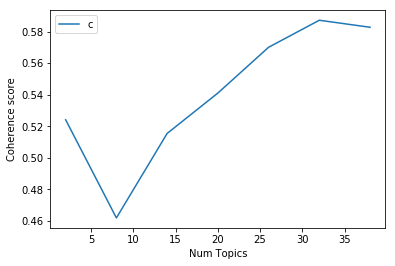

In [57]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=cleaned_column, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [58]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5241
Num Topics = 8  has Coherence Value of 0.4618
Num Topics = 14  has Coherence Value of 0.5154
Num Topics = 20  has Coherence Value of 0.541
Num Topics = 26  has Coherence Value of 0.5701
Num Topics = 32  has Coherence Value of 0.5872
Num Topics = 38  has Coherence Value of 0.5828


Si le score de coh√©rence semble continuer √† augmenter, il peut √™tre pr√©f√©rable de choisir le mod√®le qui a donn√© le CV le plus √©lev√© avant d'aplatir. C'est exactement le cas ici.

Donc, pour les prochaines √©tapes, je choisirai le mod√®le avec 20 sujets.

# *Remarque* : il existe de nombreuses autres approches pour √©valuer les mod√®les de sujets tels que Perplexity, mais son indicateur m√©diocre de la qualit√© des sujets. TOPIC COHERENCE MEASURE est √©galement un bon moyen d'√©valuer les mod√®les de sujet. La mesure de la coh√©rence des sujets est un bon moyen de comparer les mod√®les de sujets diff√©rents en fonction de leur interpr√©tabilit√© humaine. 

In [59]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(9,
  '0.018*"android" + 0.016*"music" + 0.015*"cyrus" + 0.014*"miley" + '
  '0.014*"play" + 0.013*"googl" + 0.012*"ceo" + 0.012*"mad" + 0.012*"app" + '
  '0.012*"data"'),
 (11,
  '0.033*"compani" + 0.032*"ebola" + 0.022*"outbreak" + 0.019*"virus" + '
  '0.018*"use" + 0.016*"propos" + 0.015*"grow" + 0.013*"public" + '
  '0.011*"govern" + 0.011*"investig"'),
 (6,
  '0.039*"amazon" + 0.028*"launch" + 0.022*"smartphon" + 0.022*"death" + '
  '0.017*"america" + 0.016*"life" + 0.015*"reach" + 0.014*"walk" + '
  '0.014*"season" + 0.013*"new"'),
 (3,
  '0.020*"increas" + 0.018*"deal" + 0.017*"gas" + 0.015*"beyonc" + '
  '0.015*"russia" + 0.014*"jay" + 0.012*"alleg" + 0.012*"latest" + '
  '0.012*"attack" + 0.011*"host"'),
 (28,
  '0.056*"samsung" + 0.046*"galaxi" + 0.025*"facebook" + 0.019*"wall" + '
  '0.019*"featur" + 0.015*"street" + 0.014*"app" + 0.012*"android" + '
  '0.012*"scientist" + 0.011*"note"'),
 (21,
  '0.025*"award" + 0.019*"japan" + 0.018*"second" + 0.017*"close" + '
  '0.017*"

In [ ]:
Ce sont les th√®mes du mod√®le LDA choisi.

# 8)  Trouver le sujet dominant dans chaque phrase

L'une des applications pratiques de la mod√©lisation de sujets consiste √† d√©terminer le sujet d'un document donn√©.

Pour trouver cela, nous trouvons le num√©ro de sujet qui contient le pourcentage de contribution le plus √©lev√© dans ce document.

La fonction ci-dessous agr√®ge bien ces informations dans une table pr√©sentable.format_topics_sentences()

In [60]:
def format_topics_sentences(ldamodel=model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=cleaned_column)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             4.0              0.1969   
1            1             9.0              0.4395   
2            2             5.0              0.2051   
3            3            12.0              0.3285   
4            4            14.0              0.5172   
5            5             5.0              0.1489   
6            6             5.0              0.3059   
7            7             2.0              0.4628   
8            8            11.0              0.1926   
9            9            15.0              0.3639   

                                            Keywords  \
0  video, season, game, new, final, announc, thro...   
1  end, home, phone, expect, smartphon, quarter, ...   
2  rise, world, die, googl, open, go, babi, glass...   
3  look, bank, record, help, warn, rate, men, nee...   
4  price, sale, news, releas, data, reveal, new, ...   
5  rise, world, die, googl, open, go, babi, glass...   
6  rise, world, die, googl, open, go, babi, glass...   
7  stock, buy, deal, billion, like, sell, compani...   
8  day, chang, futur, best, drug, unveil, post, h...   
9  year, share, hit, twitter, car, mobil, state, ...   

                                                Text  
0        [spoiler, free, busi, lesson, game, throne]  
1  [robin, william, enter, treatment, fine, tune,...  
2              [fact, american, creep, googl, glass]  
3             [ail, space, telescop, get, nd, chanc]  
4  [jack, white, reveal, detail, new, album, laza...  
5                               [king, crush, debut]  
6                  [woman, help, appl, save, planet]  
7  [merger, domin, wall, street, trade, durabl, g...  
8           [rumor, appl, unveil, home, autom, week]  
9  [conscious, uncoupl, pretenti, defens, word, w...

# 9) Trouver le document le plus repr√©sentatif pour chaque sujet

Parfois, seuls les mots-cl√©s du sujet peuvent ne pas suffire √† donner un sens au sujet. Donc, pour aider √† comprendre le sujet, vous pouvez trouver les documents auxquels un sujet donn√© a le plus contribu√© et d√©duire le sujet en lisant ce document. 

In [61]:
# Group top 5 sentences under each topic
sent_topics_sorted = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorted = pd.concat([sent_topics_sorted, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorted.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorted.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorted.head()

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.5661   
1        1.0              0.5604   
2        2.0              0.6288   
3        3.0              0.5967   
4        4.0              0.5565   

                                            Keywords  \
0  music, talk, photo, man, tv, profit, uk, week,...   
1  say, million, recal, gm, ceo, internet, award,...   
2  stock, buy, deal, billion, like, sell, compani...   
3  star, time, war, join, cast, return, window, c...   
4  video, season, game, new, final, announc, thro...   

                                                Text  
0        [marc, webb, talk, amaz, spider, man, plot]  
1  [batman, suit, pic, forget, kevin, smith, say,...  
2  [india, sun, pharma, buy, troubl, drugmak, ran...  
3  [christina, chong, join, cast, star, war, epis...  
4  [codi, simpson, danc, star, cha, cha, cha, vid...

Le tableau ci-dessus contient le num√©ro du sujet, les mots-cl√©s et le document le plus repr√©sentatif. La Topic_Perc_Contribution colonne n'est rien d'autre que le pourcentage de contribution du sujet dans le document donn√©.

# 10)  Distribution de sujets entre documents

Enfin, nous souhaitons comprendre le volume et la distribution des sujets afin de juger de l‚Äôampleur des discussions. Le tableau ci-dessous expose ces informations.

In [62]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(20)

Dominant_Topic                                     Topic_Keywords  \
0              4.0  video, season, game, new, final, announc, thro...   
1              9.0  end, home, phone, expect, smartphon, quarter, ...   
2              5.0  rise, world, die, googl, open, go, babi, glass...   
3             12.0  look, bank, record, help, warn, rate, men, nee...   
4             14.0  price, sale, news, releas, data, reveal, new, ...   
5              5.0  rise, world, die, googl, open, go, babi, glass...   
6              5.0  rise, world, die, googl, open, go, babi, glass...   
7              2.0  stock, buy, deal, billion, like, sell, compani...   
8             11.0  day, chang, futur, best, drug, unveil, post, h...   
9             15.0  year, share, hit, twitter, car, mobil, state, ...   
10             0.0  music, talk, photo, man, tv, profit, uk, week,...   
11            18.0  american, bieber, live, justin, close, issu, c...   
12             6.0  kardashian, kim, west, kany, stream, chris, ne...   
13             2.0  stock, buy, deal, billion, like, sell, compani...   
14             4.0  video, season, game, new, final, announc, thro...   
15             0.0  music, talk, photo, man, tv, profit, uk, week,...   
16             6.0  kardashian, kim, west, kany, stream, chris, ne...   
17             4.0  video, season, game, new, final, announc, thro...   
18            17.0  googl, launch, android, set, call, loss, heart...   
19             2.0  stock, buy, deal, billion, like, sell, compani...   

    Num_Documents  Perc_Documents  
0           354.0          0.0354  
1           539.0          0.0539  
2           681.0          0.0681  
3           434.0          0.0434  
4           680.0          0.0680  
5           515.0          0.0515  
6           405.0          0.0405  
7           878.0          0.0878  
8           423.0          0.0423  
9           383.0          0.0383  
10          395.0          0.0395  
11          442.0          0.0442  
12          409.0          0.0409  
13          506.0          0.0506  
14          561.0          0.0561  
15          461.0          0.0461  
16          594.0          0.0594  
17          473.0          0.0473  
18          452.0          0.0452  
19          415.0          0.0415

# 11) Conclusion

### En gros, nous avons construit un mod√®le de sujet de base en utilisant le LDA de Gensim et visualis√© les sujets en utilisant pyLDAvis. Ensuite, nous avons vu comment trouver le nombre optimal de sujets en utilisant les scores de coh√©rence et comment comprendre logiquement comment choisir le mod√®le optimal.

### Enfin, nous avons vu comment agr√©ger et pr√©senter les r√©sultats pour g√©n√©rer des informations qui pourraient √™tre plus exploitables.